## Load Data from CSVs

In [2]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

with open('enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': u'2015-01-14',
 u'days_to_cancel': u'65',
 u'is_canceled': u'True',
 u'is_udacity': u'True',
 u'join_date': u'2014-11-10',
 u'status': u'canceled'}

In [3]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.

def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

daily_engagement = read_csv('daily_engagement.csv')
project_submissions = read_csv('project_submissions.csv')

print daily_engagement[0]
print project_submissions[0]

{u'lessons_completed': u'0.0', u'num_courses_visited': u'1.0', u'total_minutes_visited': u'11.6793745', u'projects_completed': u'0.0', u'acct': u'0', u'utc_date': u'2015-01-09'}
{u'lesson_key': u'3176718735', u'processing_state': u'EVALUATED', u'account_key': u'256', u'assigned_rating': u'UNGRADED', u'completion_date': u'2015-01-16', u'creation_date': u'2015-01-14'}


## Fixing Data Types

In [4]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [5]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [6]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

## Investigating the Data

In [7]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".

for engagement_record in daily_engagement:
    engagement_record['account_key'] = engagement_record['acct']
    del[engagement_record['acct']]
daily_engagement[0]['account_key']

u'0'

In [8]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.
print len(enrollments)
print len(daily_engagement)
print len(project_submissions)

def unique_set(data):
    unique = set()
    for record in data:
        unique.add(record['account_key'])
    return unique

print len(unique_set(enrollments))
print len(unique_set(daily_engagement))
print len(unique_set(project_submissions))

1640
136240
3642
1302
1237
743


## Problems in the Data

## Missing Engagement Records

In [9]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.
missing_students = unique_set(enrollments) - unique_set(daily_engagement)
print len(missing_students)
print missing_students

for enrollment in enrollments:
    if enrollment['account_key'] not in unique_set(daily_engagement):
        print enrollment
        break

65
set([u'1304', u'1129', u'1186', u'875', u'1222', u'1213', u'1120', u'749', u'1148', u'707', u'766', u'1125', u'1237', u'870', u'878', u'819', u'1191', u'1190', u'1145', u'733', u'799', u'871', u'717', u'654', u'727', u'737', u'739', u'914', u'1219', u'1291', u'1010', u'889', u'817', u'1025', u'997', u'996', u'981', u'1171', u'1270', u'1218', u'1273', u'1238', u'902', u'711', u'750', u'664', u'1069', u'1284', u'841', u'1044', u'1086', u'1155', u'1079', u'968', u'789', u'1241', u'964', u'725', u'884', u'728', u'1101', u'803', u'802', u'1063', u'926'])
{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 12, 0, 0), u'account_key': u'1219', u'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), u'days_to_cancel': 0}


## Checking for More Problem Records

In [10]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.

for enrollment in enrollments:
    if enrollment['account_key'] not in unique_set(daily_engagement) \
        and enrollment['days_to_cancel'] != 0:
            print enrollment

{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 59}
{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 3, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), u'days_to_cancel': 99}
{u'status': u'current', u'is_udacity': True, u'is_canceled': False, u'join_date': datetime.datetime(2015, 2, 25, 0, 0), u'account_key': u'1101', u'cancel_date': None, u'days_to_cancel': None}


## Tracking Down the Remaining Problems

In [11]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [12]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [13]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)
for item in non_udacity_engagement:
    print item
    break
for item in non_udacity_enrollments:
    if item['account_key'] == '108':
        print item

1622
135656
3634
{u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 11.6793745, u'projects_completed': 0, 'account_key': u'0', u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}
{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 7, 0, 0), u'account_key': u'108', u'cancel_date': datetime.datetime(2015, 4, 20, 0, 0), u'days_to_cancel': 103}
{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2015, 4, 20, 0, 0), u'account_key': u'108', u'cancel_date': datetime.datetime(2015, 5, 14, 0, 0), u'days_to_cancel': 24}


## Refining the Question

In [14]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = {}
for student in non_udacity_enrollments:
    if student['cancel_date'] == None or student['days_to_cancel'] > 7:
        if student['account_key'] not in paid_students or \
            student['join_date'] > paid_students[student['account_key']]:
            paid_students[student['account_key']] = student['join_date']
print len(paid_students)

for item in paid_students:
    print item
    print paid_students[item]
    break

995
1200
2015-03-04 00:00:00


## Getting Data from First Week

In [15]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7

In [16]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

paid_engagement_in_first_week = []
for engagement in non_udacity_engagement:
    if engagement['account_key'] in paid_students and \
        within_one_week(paid_students[engagement['account_key']], engagement['utc_date']) and \
        engagement['utc_date'] >= paid_students[engagement['account_key']]:
            paid_engagement_in_first_week.append(engagement)
#            if engagement['account_key'] == '108':
#                print paid_students[engagement['account_key']]
#                break
print len(paid_engagement_in_first_week)
print paid_engagement_in_first_week[0]

6919
{u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 11.6793745, u'projects_completed': 0, 'account_key': u'0', u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}


## Exploring Student Engagement

In [17]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
def group_data(data,grouping_field):
    grouped_data = defaultdict(list)
    for record in data:
#        account_key = record[grouping_field]
        grouped_data[record[grouping_field]].append(record)
    return grouped_data

#engagement_by_account = defaultdict(list)
#for engagement_record in paid_engagement_in_first_week:
#    account_key = engagement_record['account_key']
#    engagement_by_account[account_key].append(engagement_record)

engagement_by_account = group_data(paid_engagement_in_first_week,'account_key')
#print len(engagement_by_account1)
print len(engagement_by_account)
#print engagement_by_account.items()

for key, value in engagement_by_account.iteritems():
    print key, value
    break

995
1200 [{u'lessons_completed': 1, u'num_courses_visited': 2, u'total_minutes_visited': 114.853432, u'projects_completed': 0, 'account_key': u'1200', u'utc_date': datetime.datetime(2015, 3, 4, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 43.4168625, u'projects_completed': 0, 'account_key': u'1200', u'utc_date': datetime.datetime(2015, 3, 5, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 187.776832833, u'projects_completed': 0, 'account_key': u'1200', u'utc_date': datetime.datetime(2015, 3, 6, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 150.081577333, u'projects_completed': 0, 'account_key': u'1200', u'utc_date': datetime.datetime(2015, 3, 7, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 191.61088, u'projects_completed': 0, 'account_key': u'1200', u'utc_date': datetime.datetime(2015, 3, 8, 0, 0)}, {u'lessons_completed': 0,

In [18]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
def total(engagement_data, engagement_field):
    total_out = {}
    for account_key, engagement_for_student in engagement_data.items():
        total_field = 0
        for engagement_record in engagement_for_student:
            if engagement_field <> 'num_courses_visited':
                total_field += float(engagement_record[engagement_field])
            else:
                if float(engagement_record[engagement_field]) > 0:
                    total_field += 1
        total_out[account_key] = total_field
    return total_out

total_minutes_by_account = total(engagement_by_account,'total_minutes_visited')
#    if total_minutes_by_account[account_key] > 10080:
#        print account_key, engagement_for_student
#        break

#for account_key in total_minutes_by_account:
#    if total_minutes_by_account[account_key] > 10080:
#        print account_key, total_minutes_by_account[account_key]
#        break

Populating the interactive namespace from numpy and matplotlib
Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645
Variance 170566.467005


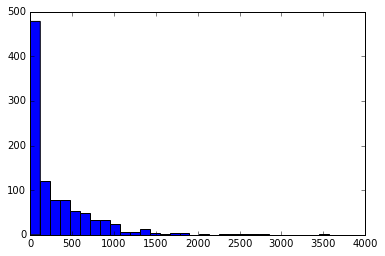

In [30]:
%pylab inline

import numpy as np
import matplotlib.pyplot as plt

# Summarize the data about minutes spent in the classroom
def stats(values):
    print 'Mean:', np.mean(values)
    print 'Standard deviation:', np.std(values)
    print 'Minimum:', np.min(values)
    print 'Maximum:', np.max(values)
    print 'Variance', np.var(values)
    plt.hist(values, bins=30)
    
#total_minutes = total_minutes_by_account.values()
stats(total_minutes_by_account.values())

## Debugging Data Analysis Code

In [20]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.
print len(total_minutes_by_account)
print max(total_minutes_by_account.items(), key=lambda pair: pair[1])

for account_key in total_minutes_by_account:
    if total_minutes_by_account[account_key] > 10080:
        print account_key, total_minutes_by_account[account_key]
        break

for item in non_udacity_enrollments:
    if item['account_key'] == '108':
        print item

995
(u'163', 3564.7332644989997)
{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 7, 0, 0), u'account_key': u'108', u'cancel_date': datetime.datetime(2015, 4, 20, 0, 0), u'days_to_cancel': 103}
{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2015, 4, 20, 0, 0), u'account_key': u'108', u'cancel_date': datetime.datetime(2015, 5, 14, 0, 0), u'days_to_cancel': 24}


## Lessons Completed in First Week

995
(u'633', 36.0)
Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0.0
Maximum: 36.0
Variance 9.01537435923


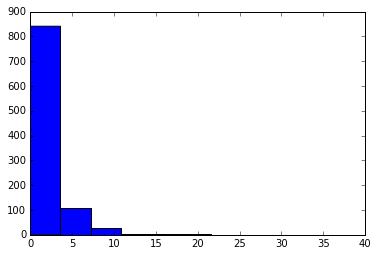

In [21]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

total_lessons_by_account = total(engagement_by_account,'lessons_completed')

print len(total_lessons_by_account)
print max(total_lessons_by_account.items(), key=lambda pair: pair[1])
stats(total_lessons_by_account.values())

## Number of Visits in First Week

995
(u'344', 7)
Mean: 2.86733668342
Standard deviation: 2.25519800292
Minimum: 0
Maximum: 7
Variance 5.08591803237


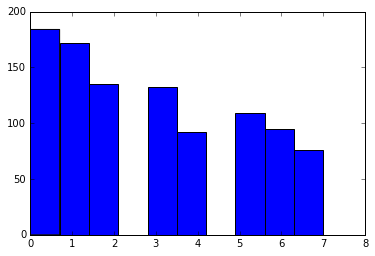

In [22]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.

total_visits_by_account = total(engagement_by_account,'num_courses_visited')

print len(total_visits_by_account)
print max(total_visits_by_account.items(), key=lambda pair: pair[1])
stats(total_visits_by_account.values())

## Splitting out Passing Students

In [23]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']
pass_grade = ['PASSED','DISTINCTION']
passed_students = set()

passing_engagement = []
non_passing_engagement = []

for submission in non_udacity_submissions:
    if submission['assigned_rating'] in pass_grade and submission['lesson_key'] in subway_project_lesson_keys:
        passed_students.add(submission['account_key'])
    
print len(passed_students)
#print passed_students

#for account_key in engagement_by_account:
#    if account_key in passed_students:
#        passing_engagement.update({account_key:engagement_by_account[account_key]})
#    else:
#        non_passing_engagement.update({account_key:engagement_by_account[account_key]})

for engagement in paid_engagement_in_first_week:
    if engagement['account_key'] not in passed_students:
        non_passing_engagement.append(engagement)
    else:
        passing_engagement.append(engagement)

print len(passing_engagement)
print len(non_passing_engagement)
                          


651
4527
2392


## Comparing the Two Student Groups

348
647
344 [{u'lessons_completed': 0, u'num_courses_visited': 2, u'total_minutes_visited': 20.0477405, u'projects_completed': 0, 'account_key': u'344', u'utc_date': datetime.datetime(2015, 1, 11, 0, 0)}, {u'lessons_completed': 2, u'num_courses_visited': 1, u'total_minutes_visited': 301.955414, u'projects_completed': 0, 'account_key': u'344', u'utc_date': datetime.datetime(2015, 1, 12, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 57.5928861667, u'projects_completed': 0, 'account_key': u'344', u'utc_date': datetime.datetime(2015, 1, 13, 0, 0)}, {u'lessons_completed': 1, u'num_courses_visited': 1, u'total_minutes_visited': 93.0164545, u'projects_completed': 0, 'account_key': u'344', u'utc_date': datetime.datetime(2015, 1, 14, 0, 0)}, {u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 18.1819243333, u'projects_completed': 0, 'account_key': u'344', u'utc_date': datetime.datetime(2015, 1, 15, 0, 0)}, {u'lessons_completed'

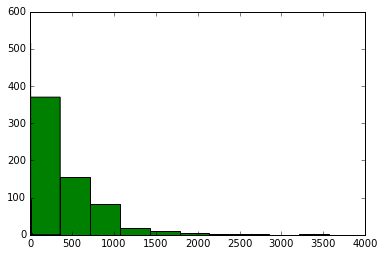

In [24]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).
passing_engagement_by_account = group_data(passing_engagement,'account_key')
non_passing_engagement_by_account = group_data(non_passing_engagement,'account_key')
print len(non_passing_engagement_by_account)
print len(passing_engagement_by_account)
#print engagement_by_account.items()

for key, value in passing_engagement_by_account.iteritems():
    print key, value
    for v in value:
        print v['utc_date'].month
    break

total_minutes_by_non_passing_account = total(non_passing_engagement_by_account,'total_minutes_visited')
total_lessons_by_non_passing_account = total(non_passing_engagement_by_account,'lessons_completed')
total_visits_by_non_passing_account = total(non_passing_engagement_by_account,'num_courses_visited')
total_visits_by_passing_account = total(passing_engagement_by_account,'num_courses_visited')
print "Minutes spent Stats for Non Passing students:"
stats(total_minutes_by_non_passing_account.values())
print ""
total_minutes_by_passing_account = total(passing_engagement_by_account,'total_minutes_visited')
total_lessons_by_passing_account = total(passing_engagement_by_account,'lessons_completed')
print "Minutes spent Stats for Passing students:"
stats(total_minutes_by_passing_account.values())
print ""
print "Lessons Stats for Non Passing students:"
stats(total_lessons_by_non_passing_account.values())
print ""
stats(total_lessons_by_passing_account.values())
print ""

def joining_month(engagement_data, engagement_field):
    total_out = {}
    for account_key, engagement_for_student in engagement_data.items():
#        total_field = 0
        for engagement_record in engagement_for_student:
#            if engagement_field <> 'num_courses_visited':
#                total_field += float(engagement_record[engagement_field])
            total_out[account_key] = engagement_record[engagement_field].month
            break
#            else:
#                if float(engagement_record[engagement_field]) > 0:
#                    total_field += 1
#        total_out[account_key] = total_field
    return total_out

joining_mnth_by_account_passed = joining_month(passing_engagement_by_account,'utc_date')
joining_mnth_by_account_not_passed = joining_month(non_passing_engagement_by_account,'utc_date')
print len(joining_mnth_by_account_passed)
print len(joining_mnth_by_account_not_passed)

## Making Histograms

(array([ 97.,  90.,  56.,  41.,  15.,  24.,  17.,   8.]),
 array([ 0.   ,  0.875,  1.75 ,  2.625,  3.5  ,  4.375,  5.25 ,  6.125,  7.   ]),
 <a list of 8 Patch objects>)

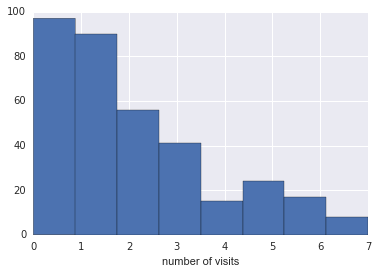

In [34]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

data = [1, 2, 1, 3, 3, 1, 4, 2]

# %matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
#plt.hist(total_minutes_by_non_passing_account.values())
#plt.hist(total_minutes_by_passing_account.values())
#plt.hist(total_lessons_by_non_passing_account.values())
#plt.hist(total_lessons_by_passing_account.values())
#plt.hist(total_visits_by_passing_account.values())
plt.xlabel("number of visits")
plt.hist(total_visits_by_non_passing_account.values(),bins=8)
#plt.hist(data)


## Improving Plots and Sharing Findings

(array([ 87.,  82.,  79.,  91.,  77.,  85.,  78.,  68.]),
 array([ 0.   ,  0.875,  1.75 ,  2.625,  3.5  ,  4.375,  5.25 ,  6.125,  7.   ]),
 <a list of 8 Patch objects>)

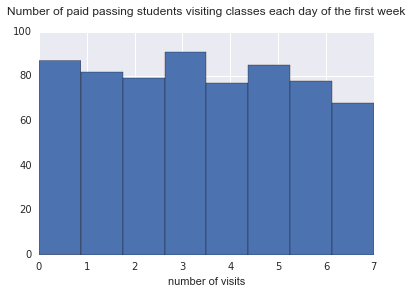

In [36]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.
plt.title("Number of paid passing students visiting classes each day of the first week\n")
plt.xlabel("number of visits")
plt.hist(total_visits_by_passing_account.values(),bins=8)